In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from financepy.models.black import *
from financepy.utils.global_types import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [2]:
def blackImpliedVol(forward,   # Forward rate F
                    K,         # Strike Rate K
                    T,         # Time to Expiry (years)
                    DF,        # df RFR to expiry date
                    callOrPut, # FinOptionTypes.EUROPEAN_CALL or FinOptionTypes.EUROPEAN_PUT
                    price
                    ):    
    min_ivol, max_ivol = 0.001, 1.0
    f = lambda ivol: Black(ivol).value(forward, K, T, DF, callOrPut) - price    
    return optimize.bisect(f, min_ivol, max_ivol) 

### Note to sell option

In [3]:
T = 1
K = 130
S0 = 100
q = 0.0
r = 0.03
DF = np.exp(-r*T)
ivol = 0.4
forward = S0 * np.exp(-q*T)/DF

model = Black(ivol)
callOrPut = OptionTypes.EUROPEAN_CALL

In [4]:
V0 = model.value(forward, K, T, DF, callOrPut)
VT = V0 / DF
print(VT)

7.96880097662272


Text(0, 0.5, 'Note value at Time T')

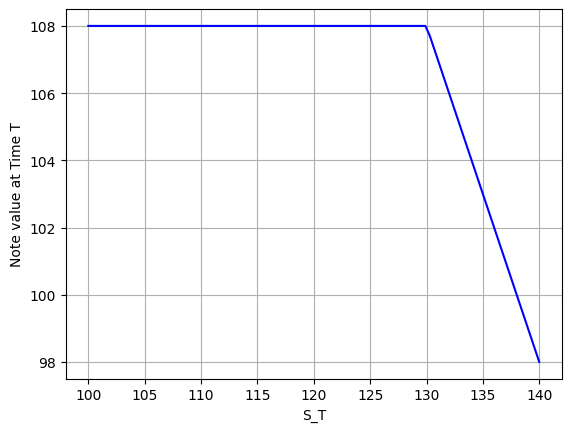

In [8]:
Spots = np.linspace(100,140,100)
Forwards = [S*np.exp(-q*T)/DF for S in Spots]

value = [100 + 8 - model.value(S, K, 1e-99, 1, callOrPut) for S in Spots]
ax = plt.plot(Spots, value, 'b')
plt.grid(linestyle='-')
plt.xlabel("S_T")
plt.ylabel("Note value at Time T")
#plt.savefig("L9_1.png")

### TWD TARF payoff

In [6]:
Notional = 1000000
BuyStrike = 28.18
Pivot = 28.20
SellStrike = 28.24
Spots = np.linspace(28.16,28.26,400)

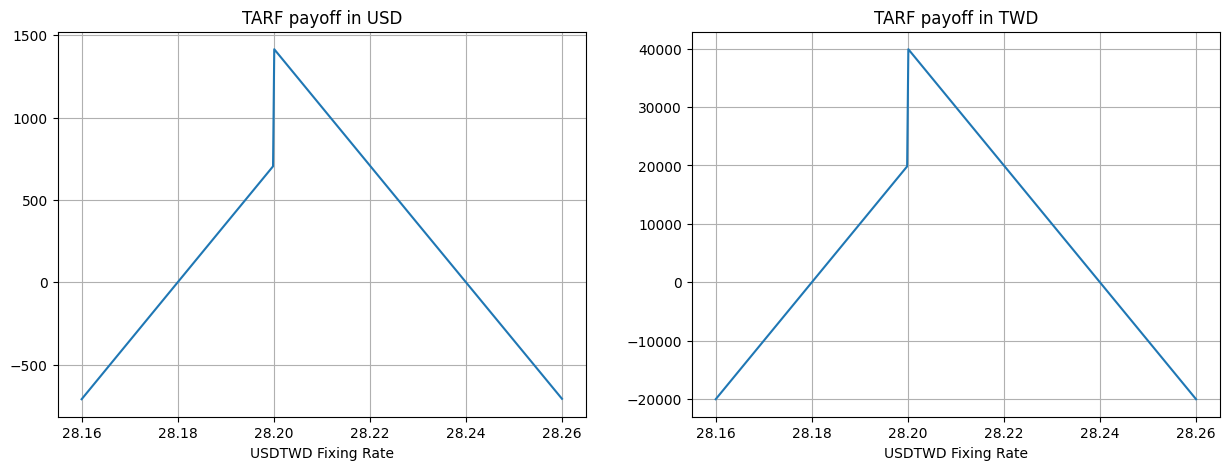

In [7]:
option1 = [-Notional*(BuyStrike-S)/S if S < BuyStrike else 0 for S in Spots]
option2 = [ Notional*(S-BuyStrike)/S  if BuyStrike <= S and S < Pivot else 0 for S in Spots]
option3 = [ Notional*(SellStrike-S)/S if Pivot <= S and S < SellStrike else 0 for S in Spots]
option4 = [-Notional*(S-SellStrike)/S if SellStrike < S else 0 for S in Spots]
TARF_payoff_USD = [o1 + o2 + o3 + o4 for o1, o2, o3, o4 in zip(option1, option2, option3, option4)]

option1_TWD = [-Notional*(BuyStrike-S) if S < BuyStrike else 0 for S in Spots]
option2_TWD = [ Notional*(S-BuyStrike)  if BuyStrike <= S and S < Pivot else 0 for S in Spots]
option3_TWD = [ Notional*(SellStrike-S) if Pivot <= S and S < SellStrike else 0 for S in Spots]
option4_TWD = [-Notional*(S-SellStrike) if SellStrike < S else 0 for S in Spots]
TARF_payoff_TWD = [o1 + o2 + o3 + o4 for o1, o2, o3, o4 in zip(option1_TWD, option2_TWD, option3_TWD, option4_TWD)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(Spots, TARF_payoff_USD)
axes[0].set_title('TARF payoff in USD')
axes[0].set_xlabel('USDTWD Fixing Rate')
axes[0].grid()

axes[1].plot(Spots, TARF_payoff_TWD)
axes[1].set_title('TARF payoff in TWD')
axes[1].set_xlabel('USDTWD Fixing Rate')
axes[1].grid()
#plt.savefig("L9_TARF.png")

### KRW TARF payoff